In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Daiict/Data mining/Project-2/smoking_driking_dataset_Ver01.csv')
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [3]:
df.shape

(991346, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df.isnull().sum()


sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [6]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [7]:
new_df = df
columns  = df.columns

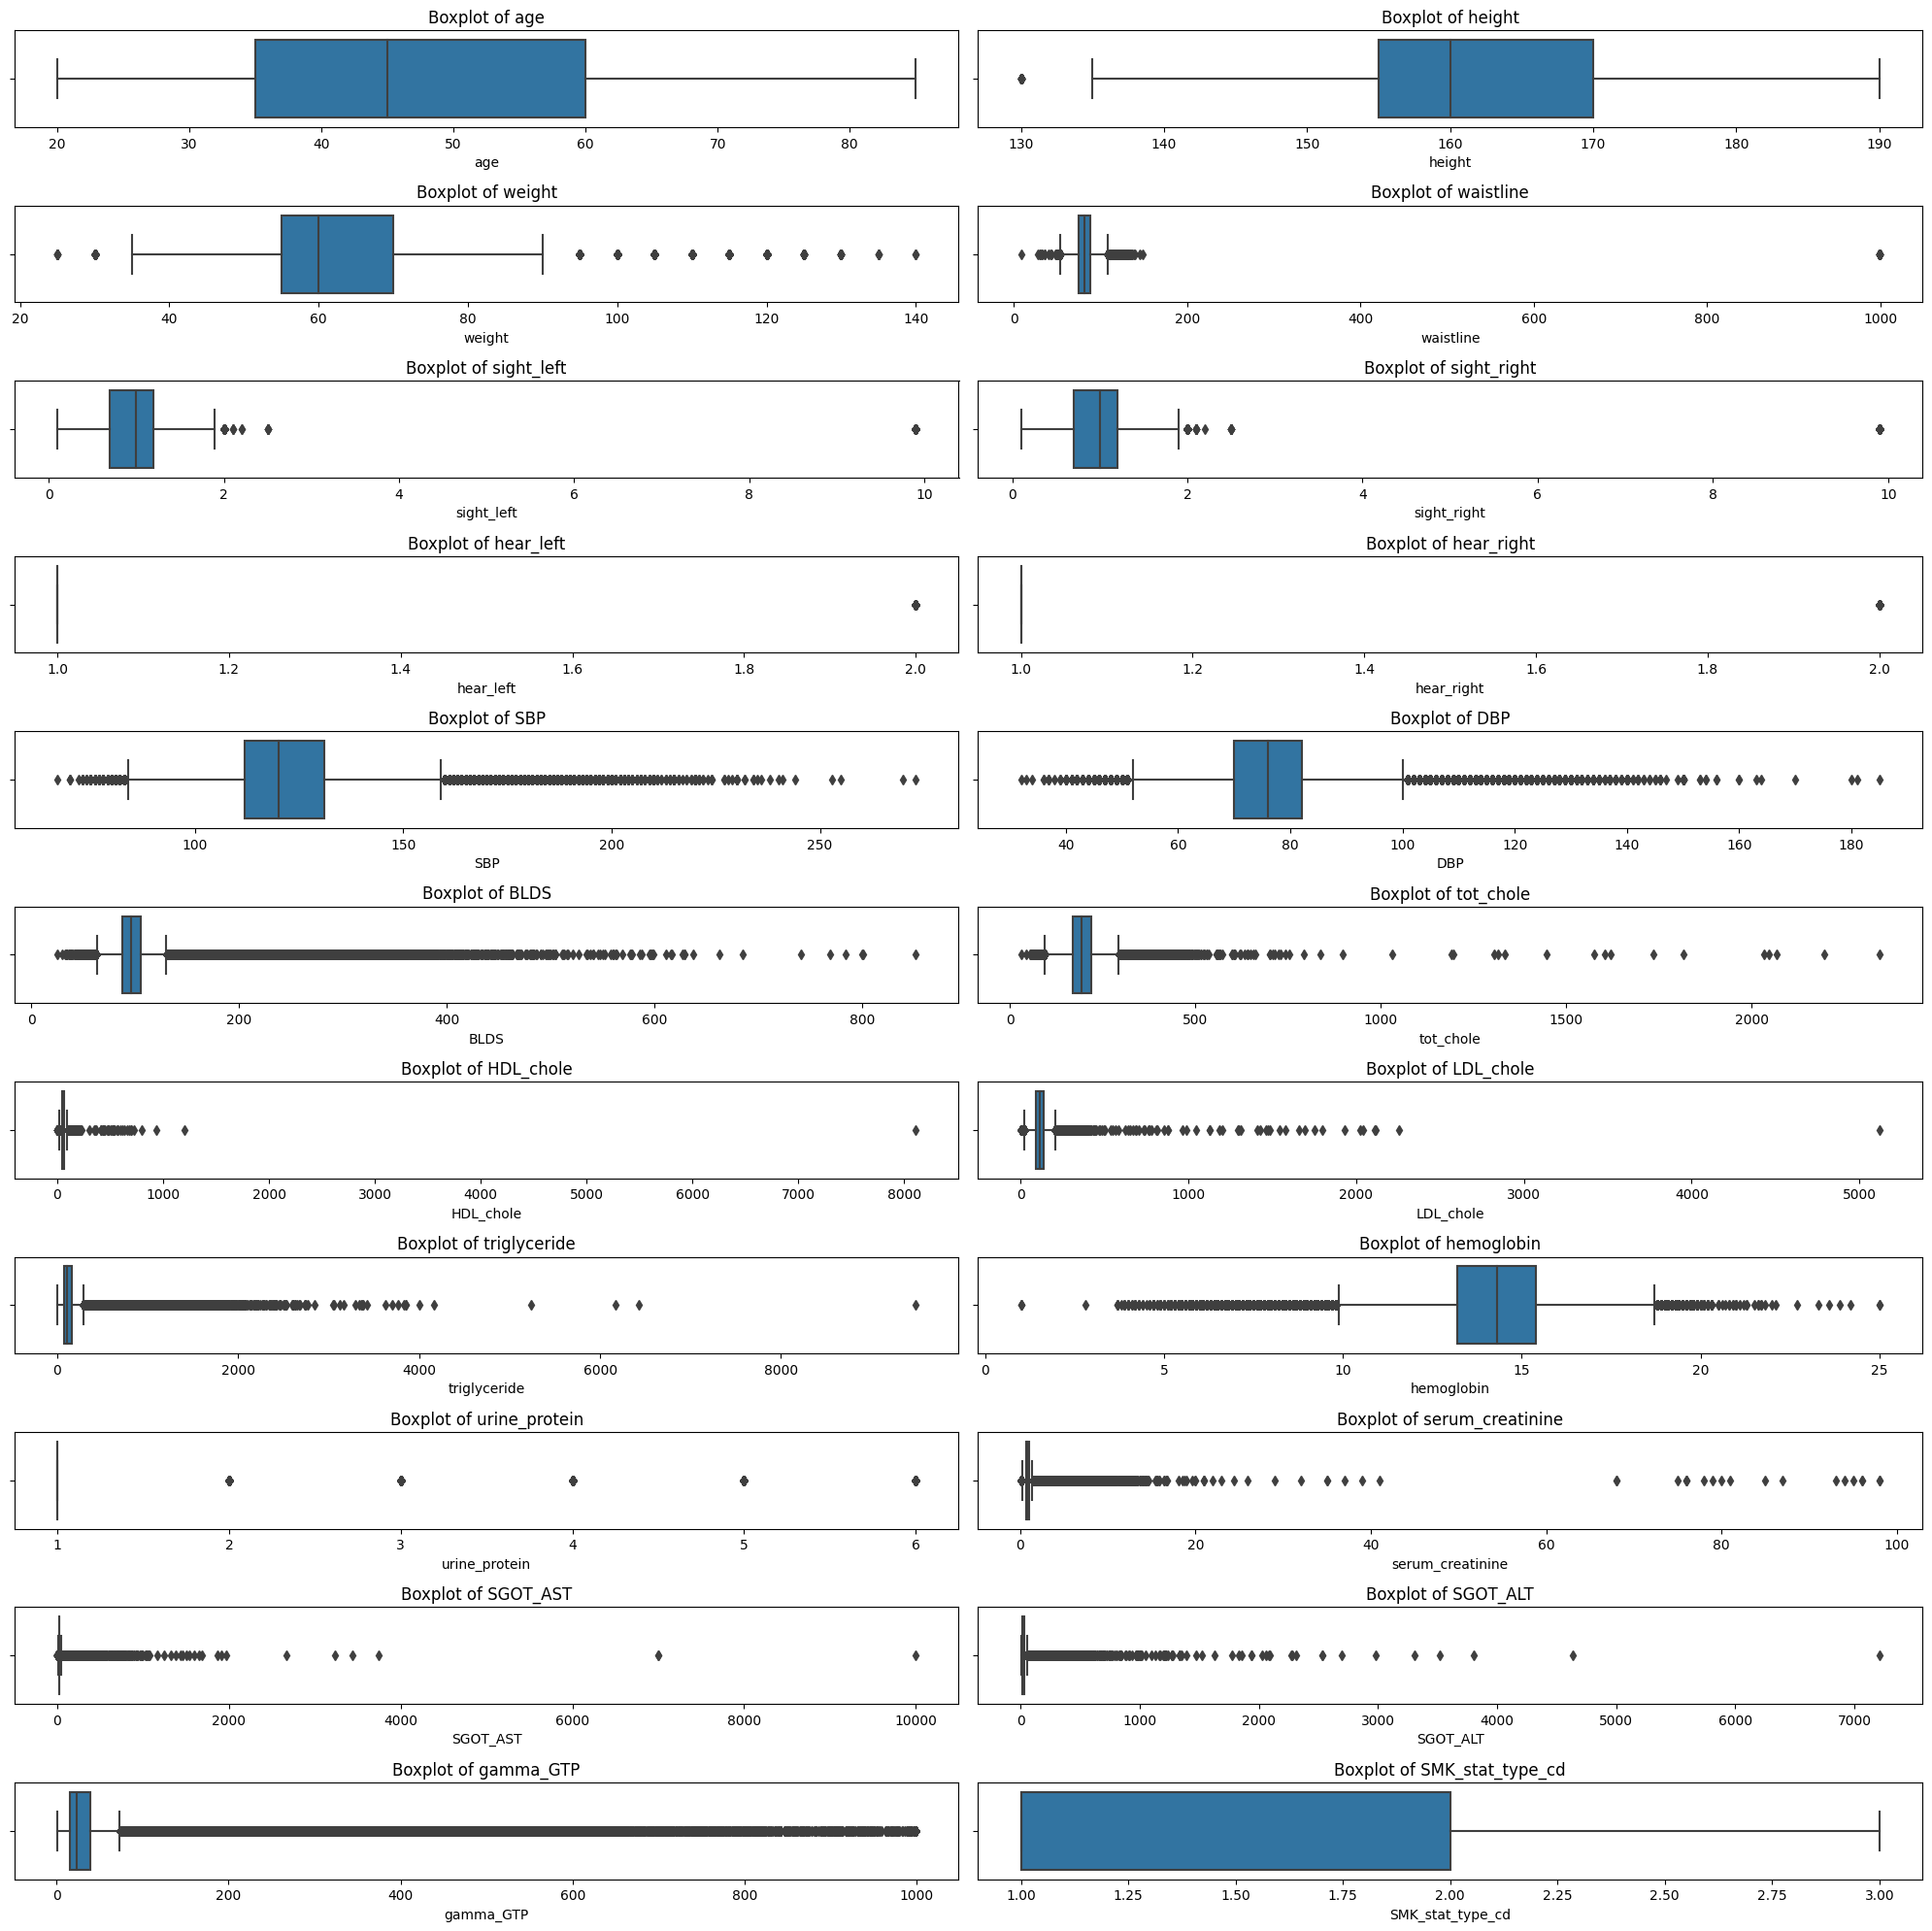

In [8]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

plot_boxplots(df)

In [9]:
new_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [10]:
#creating bmi and droping weight and height
new_df['bmi'] = df['weight']/(df['height']/100)**2

#taking average of hear and eye sight

new_df['hear'] = (new_df['hear_left'] + new_df['hear_right'])/2
new_df['sight'] = (new_df['sight_left'] + new_df['sight_right'])/2


In [11]:
new_df['map']=round(((1/3)*new_df['SBP']+(2/3)*new_df['DBP']),2)

In [12]:
new_df = new_df.drop(columns=['weight','height','hear_left','hear_right','sight_left','sight_right','SBP','DBP'])

In [13]:
new_df


,sex,age,waistline,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,hear,sight,map
0,Male,35,90.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,25.951557,1.0,1.00,93.33
1,Male,30,89.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,24.691358,1.0,1.05,98.00
2,Male,40,91.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,27.548209,1.0,1.35,86.67
3,Male,50,91.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,26.122449,1.0,1.35,106.33
4,Male,50,80.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,22.038567,1.0,1.10,100.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,92.1,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N,26.122449,1.0,1.50,91.33
991342,Male,35,86.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N,25.951557,1.0,1.25,95.00
991343,Female,40,68.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y,20.811655,1.0,0.85,83.33
991344,Male,25,72.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N,19.591837,1.0,1.25,89.00


In [14]:
new_df['SMK_stat_type_cd'] = new_df['SMK_stat_type_cd'].astype(int)
new_df.dtypes

sex                  object
age                   int64
waistline           float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd      int64
DRK_YN               object
bmi                 float64
hear                float64
sight               float64
map                 float64
dtype: object

In [15]:
# one hot encoding on sex

# Use the 'get_dummies' function to perform one-hot encoding
new_df = pd.get_dummies(new_df, columns=['sex'])
new_df

,age,waistline,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,...,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,hear,sight,map,sex_Female,sex_Male
0,35,90.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,...,35.0,40.0,1,Y,25.951557,1.0,1.00,93.33,0,1
1,30,89.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,...,36.0,27.0,3,N,24.691358,1.0,1.05,98.00,0,1
2,40,91.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,...,32.0,68.0,1,N,27.548209,1.0,1.35,86.67,0,1
3,50,91.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,...,34.0,18.0,1,N,26.122449,1.0,1.35,106.33,0,1
4,50,80.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,...,12.0,25.0,1,N,22.038567,1.0,1.10,100.67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,92.1,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,...,36.0,27.0,1,N,26.122449,1.0,1.50,91.33,0,1
991342,35,86.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,...,17.0,15.0,1,N,25.951557,1.0,1.25,95.00,0,1
991343,40,68.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,...,27.0,17.0,3,Y,20.811655,1.0,0.85,83.33,1,0
991344,25,72.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,...,14.0,17.0,1,N,19.591837,1.0,1.25,89.00,0,1


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Fit the encoder on the 'Category' column and transform it
new_df['DRK'] = label_encoder.fit_transform(new_df['DRK_YN'])

new_df = new_df.drop(columns=['DRK_YN'])
new_df

,age,waistline,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,...,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,bmi,hear,sight,map,sex_Female,sex_Male,DRK
0,35,90.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,...,35.0,40.0,1,25.951557,1.0,1.00,93.33,0,1,1
1,30,89.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,...,36.0,27.0,3,24.691358,1.0,1.05,98.00,0,1,0
2,40,91.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,...,32.0,68.0,1,27.548209,1.0,1.35,86.67,0,1,0
3,50,91.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,...,34.0,18.0,1,26.122449,1.0,1.35,106.33,0,1,0
4,50,80.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,...,12.0,25.0,1,22.038567,1.0,1.10,100.67,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,92.1,88.0,198.0,46.0,125.0,132.0,15.0,1.0,1.0,...,36.0,27.0,1,26.122449,1.0,1.50,91.33,0,1,0
991342,35,86.0,83.0,133.0,40.0,84.0,45.0,15.8,1.0,1.1,...,17.0,15.0,1,25.951557,1.0,1.25,95.00,0,1,0
991343,40,68.0,90.0,205.0,96.0,77.0,157.0,14.3,1.0,0.8,...,27.0,17.0,3,20.811655,1.0,0.85,83.33,1,0,1
991344,25,72.0,69.0,122.0,38.0,73.0,53.0,14.5,1.0,0.8,...,14.0,17.0,1,19.591837,1.0,1.25,89.00,0,1,0


In [17]:
new_df.columns

Index(['age', 'waistline', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'bmi', 'hear',
       'sight', 'map', 'sex_Female', 'sex_Male', 'DRK'],
      dtype='object')

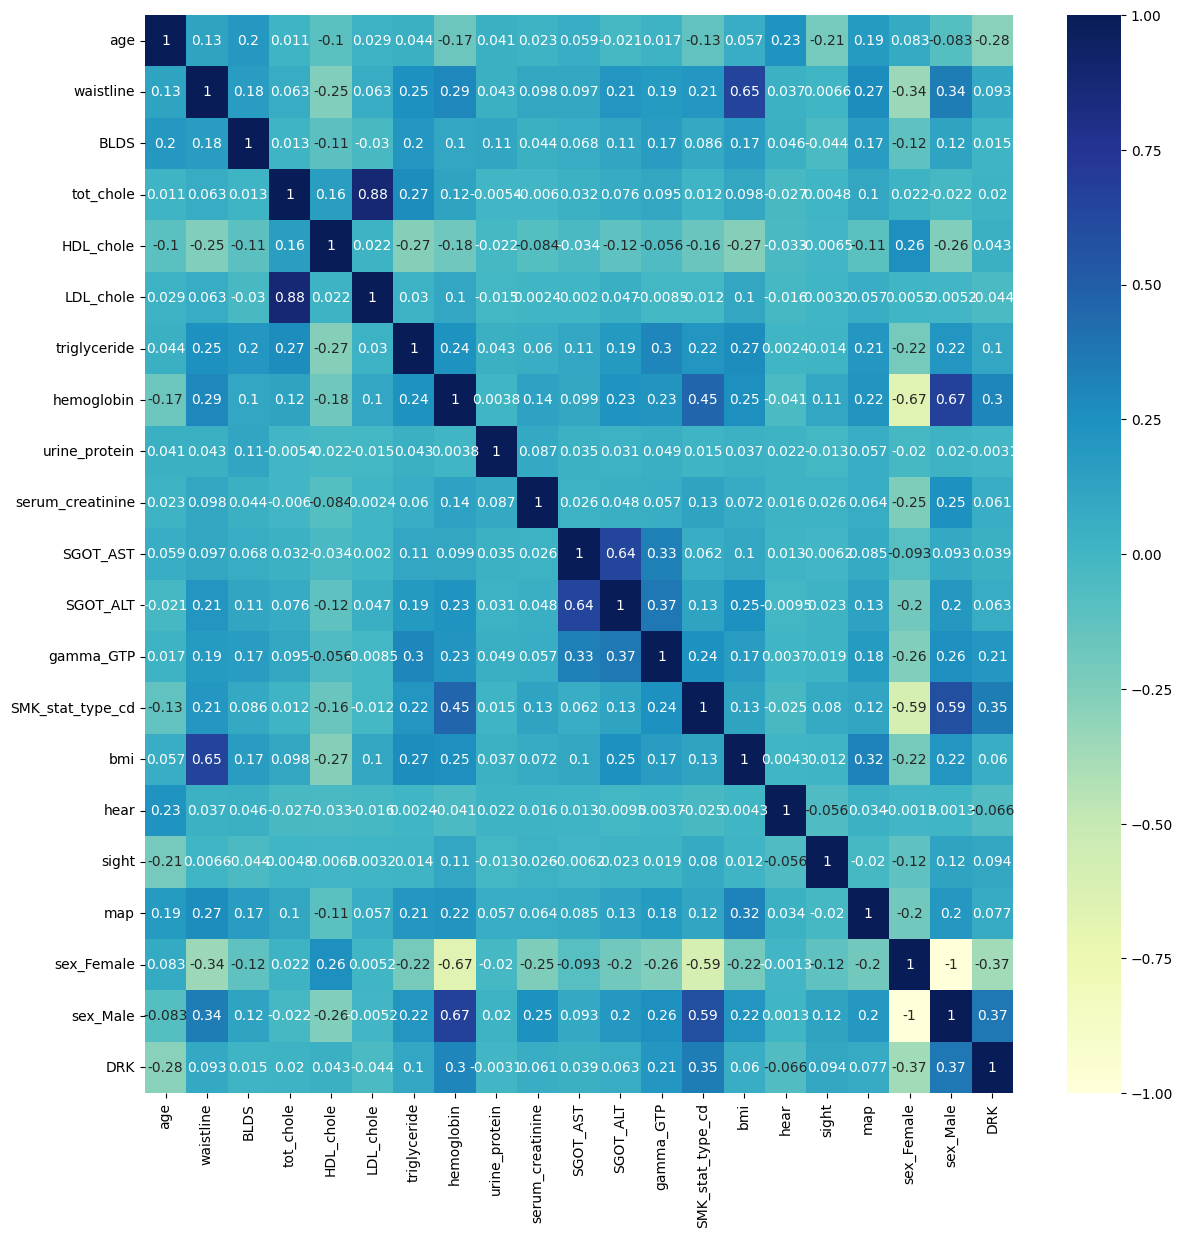

In [18]:
cor = new_df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(data=cor,annot=True,cmap='YlGnBu')
plt.show()
# Create a heatmap using seaborn


In [19]:
new_df = new_df.drop(columns=['tot_chole','LDL_chole','urine_protein','SGOT_AST','hear','sight'])

In [20]:
target_y = new_df['SMK_stat_type_cd'] -1
target_x = new_df.drop(columns='SMK_stat_type_cd')



In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target_x = scaler.fit_transform(target_x)
target_x


array([[-0.88951382,  0.73978124, -0.05891027, ..., -0.9397885 ,
         0.9397885 ,  1.0003733 ],
       [-1.24209002,  0.65539531,  0.23058581, ..., -0.9397885 ,
         0.9397885 , -0.99962684],
       [-0.53693763,  0.82416716, -0.10026685, ..., -0.9397885 ,
         0.9397885 , -0.99962684],
       ...,
       [-0.53693763, -1.11670917, -0.43111951, ...,  1.06406921,
        -1.06406921,  1.0003733 ],
       [-1.59466621, -0.77916546, -1.29960775, ..., -0.9397885 ,
         0.9397885 , -0.99962684],
       [ 0.16821475,  0.7819742 , -0.05891027, ..., -0.9397885 ,
         0.9397885 ,  1.0003733 ]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(target_x, target_y, test_size=0.2, random_state=666)

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Split your data into training and testing sets


# Create a logistic regression model
logistic_model = LogisticRegression(solver='saga',multi_class='multinomial',C=1)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report with more details
print(classification_report(y_test, y_pred))


Accuracy: 0.6906743329802795
              precision    recall  f1-score   support

           0       0.82      0.84      0.83    120621
           1       0.45      0.31      0.37     34829
           2       0.50      0.59      0.54     42820

    accuracy                           0.69    198270
   macro avg       0.59      0.58      0.58    198270
weighted avg       0.68      0.69      0.68    198270



In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifier = SGDClassifier()

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'loss': ['hinge', 'log_loss'],  # Loss function
    'alpha': [ 0.01, 0.1],  # Regularization strength
}

# Create the grid search object
grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator (model)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

# Print a classification report with more details
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'alpha': 0.01, 'loss': 'log_loss'}
Accuracy: 0.6908861653301054
              precision    recall  f1-score   support

           0       0.81      0.84      0.83    120621
           1       0.46      0.27      0.34     34829
           2       0.49      0.61      0.54     42820

    accuracy                           0.69    198270
   macro avg       0.59      0.57      0.57    198270
weighted avg       0.68      0.69      0.68    198270



In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the XGBoost classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the XGBoost classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report with more details
print(classification_report(y_test, y_pred))


Accuracy: 0.7056690371715337
              precision    recall  f1-score   support

           0       0.83      0.85      0.84    120621
           1       0.45      0.37      0.41     34829
           2       0.53      0.58      0.55     42820

    accuracy                           0.71    198270
   macro avg       0.61      0.60      0.60    198270
weighted avg       0.70      0.71      0.70    198270



In [27]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 100
lgb_model = lgb.train(params, train_data, num_round)

# Make predictions on the test data
y_pred = np.argmax(lgb_model.predict(X_test, num_iteration=num_round), axis=1)

# Evaluate the LightGBM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report with more details
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2072
[LightGBM] [Info] Number of data points in the train set: 793076, number of used features: 14
[LightGBM] [Info] Start training from score -0.498348
[LightGBM] [Info] Start training from score -1.733406
[LightGBM] [Info] Start training from score -1.533472
Accuracy: 0.705346245019418
              precision    recall  f1-score   support

           0       0.83      0.85      0.84    120621
           1       0.46      0.36      0.40     34829
           2       0.53      0.58      0.55     42820

    accuracy                           0.71    198270
   macro avg       0.60      0.60      0.60    198270
weighted avg       0.70      0.71      0.70    198270

